<a href="https://colab.research.google.com/github/debasishpohi1999/seeds.csv-df-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Report: **House Price Prediction**

**Introduction:**

The goal of this project is to develop a machine learning model capable of predicting house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, etc. The dataset used for this project contains information about house sales in King County, USA.

**1. Data Preprocessing:**

- The dataset was loaded using pandas and inspected for missing values, which were found to be absent.
- The data types were checked, and necessary conversions were made, such as converting the 'date' column to datetime. Irrelevant columns like 'id' and 'zipcode' were dropped.
- The dataset was split into features (X) and target (y), and feature scaling was performed using MinMaxScaler.
The dataset was further split into training and testing sets with a test size of 20%.

**2. Model Architecture:**

- The model architecture consists of LSTM (Long Short-Term Memory) and Dense layers.
- LSTM layers were used to capture temporal dependencies in the data.
- Dense layers were used for incorporating additional non-linearities.
- Batch normalization and dropout layers were added to improve model generalization and prevent overfitting.
- The model was compiled with Mean Squared Error (MSE) loss function and Adam optimizer.

**3. Training:**

- The model was trained for 400 epochs with a batch size of 128.
- Learning rate reduction was implemented using the ReduceLROnPlateau callback to adjust the learning rate if the validation loss plateaued.

**4. Model Evaluation:**

- After training, the model's performance was evaluated using Mean Squared Error (MSE).
- Additionally, Mean Absolute Error (MAE) and Explained Variance Score were calculated for further evaluation.

**5. Results:**

- The mean squared error between the predicted and actual house prices on the test set was found to be 0.00075, indicating good predictive performance.
- The training and validation loss curves showed that the model did not overfit the training data and generalized well to unseen data.

**Conclusion:**

- The developed model demonstrates promising results in predicting house prices based on various features.
- Further fine-tuning and optimization can potentially improve the model's performance.
- The model can be deployed in real-world applications for house price prediction, aiding in decision-making for buyers, sellers, and real estate professionals.

**Future Scope:**

- The model can be deployed as a web application or integrated into real estate platforms to provide real-time house price predictions.
- Continuous monitoring and retraining of the model with new data can improve its accuracy and relevance over time.
- Exploring advanced deep learning architectures and ensemble techniques may lead to further performance improvements.

**References:**

King County House Sales dataset: [https://datasets/harlfoxem/housesalesprediction]

- Sklearn, Tensorflow, Pandas, and Matplotlib documentation for machine learning and data visualization techniques.
- This project report encapsulates the journey of developing a house price prediction model, from data preprocessing and exploratory analysis to model development and evaluation.
- It serves as a comprehensive guide for understanding the methodologies and processes involved in predictive modeling for real estate applications.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df_new = df.drop(['id'], axis=1)
df_new

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Figure size 1200x800 with 0 Axes>

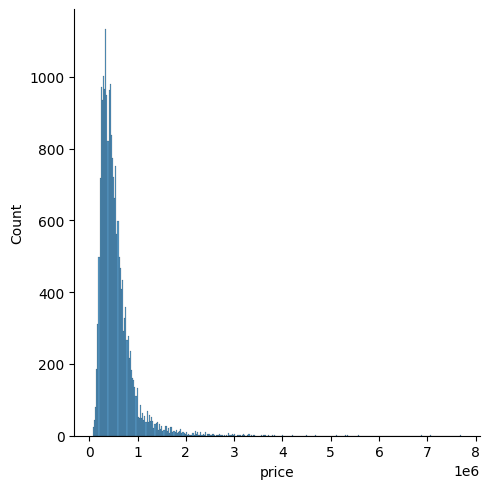

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

<Axes: ylabel='count'>

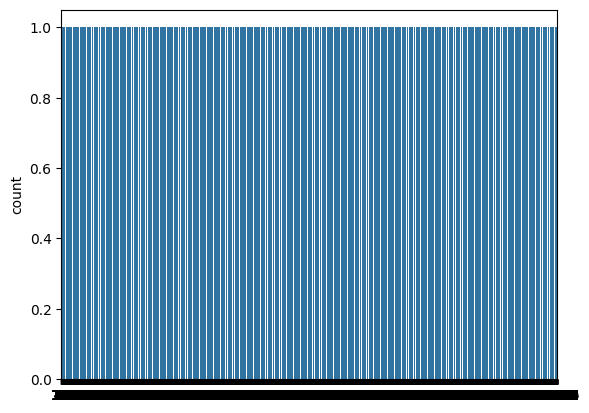

In [ ]:
sns.countplot(df['bedrooms'])

<Axes: xlabel='price', ylabel='sqft_living'>

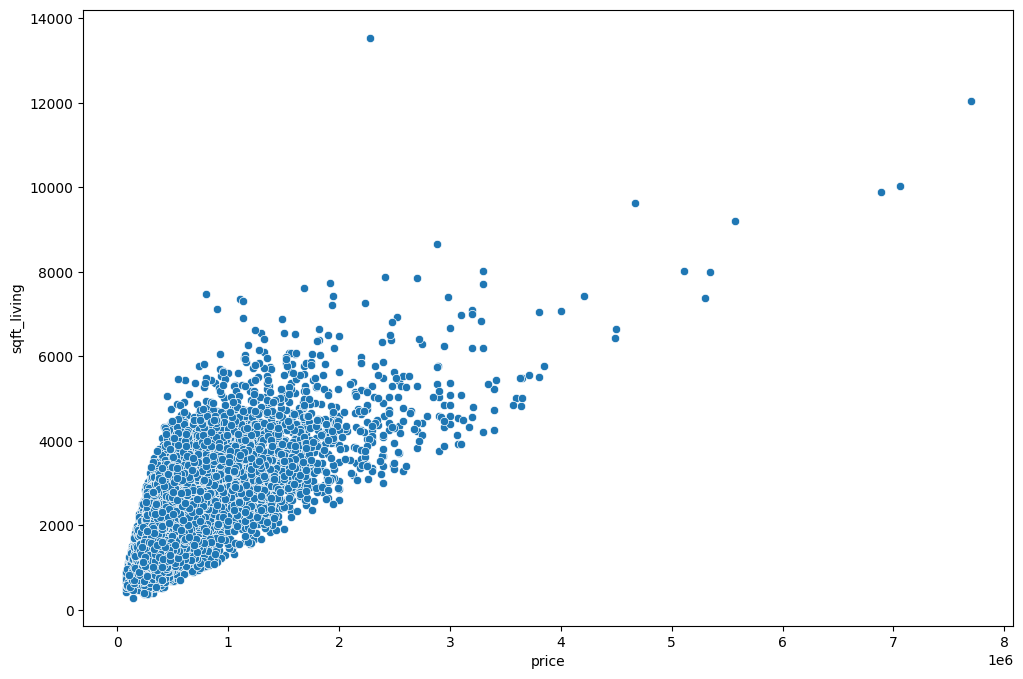

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

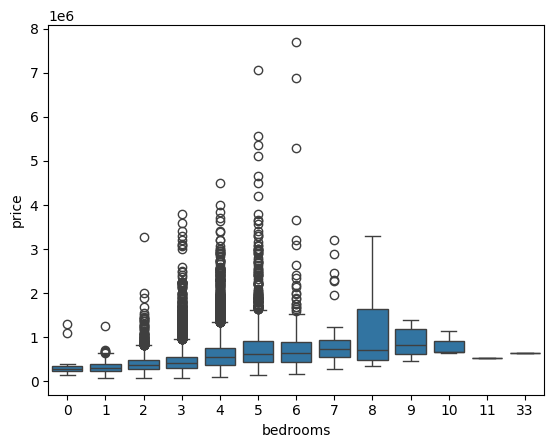

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='price', ylabel='long'>

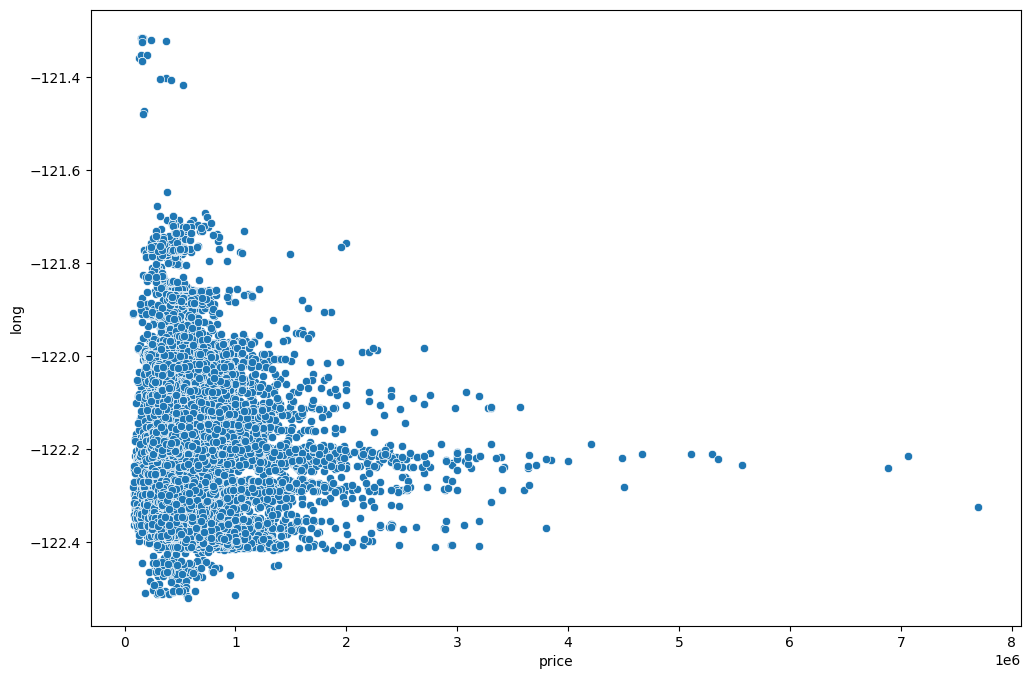

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

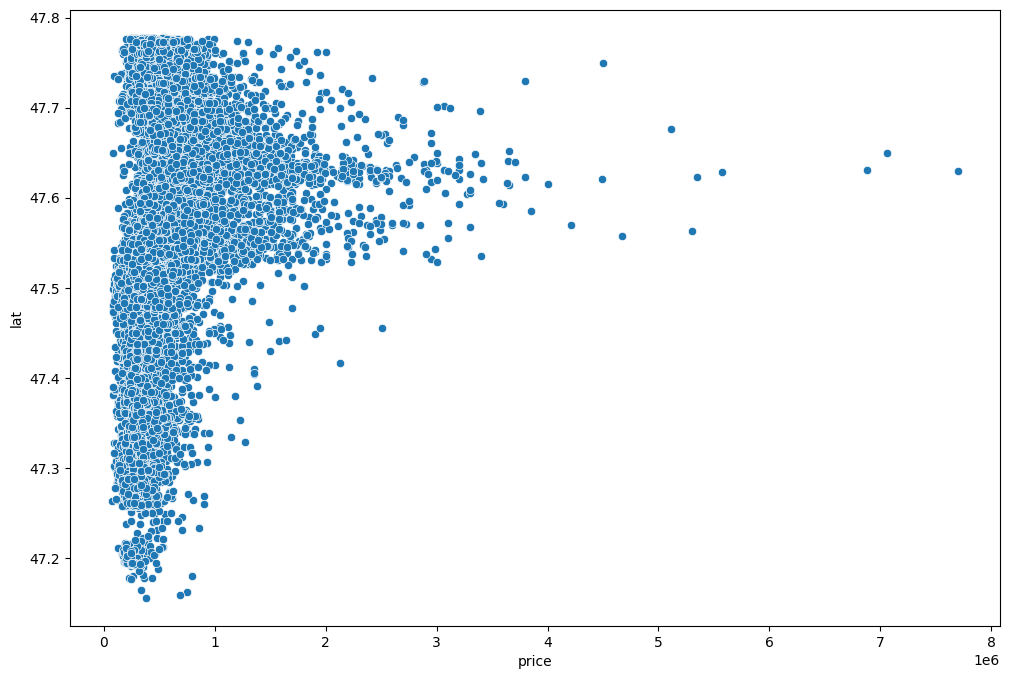

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

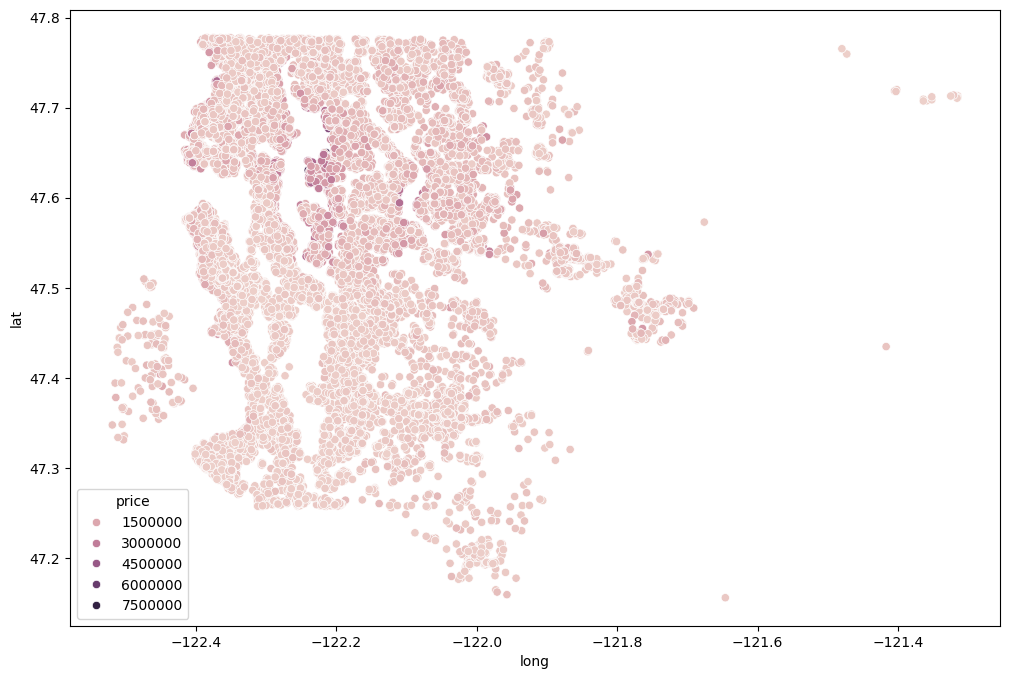

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
len(df)*(0.01)

216.13

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

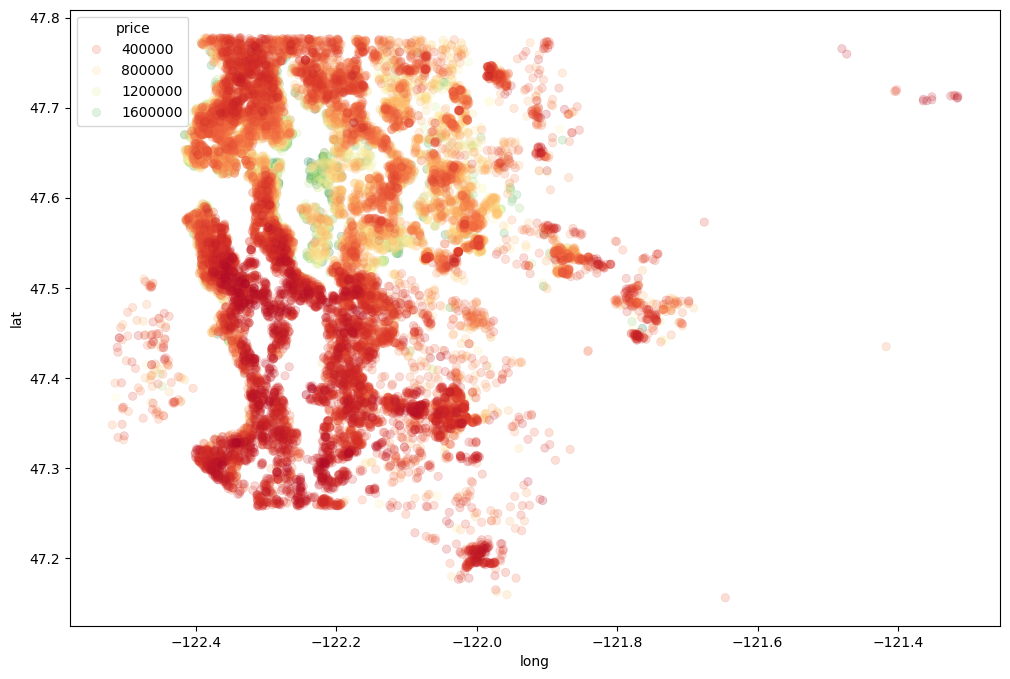

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

<Axes: xlabel='waterfront', ylabel='price'>

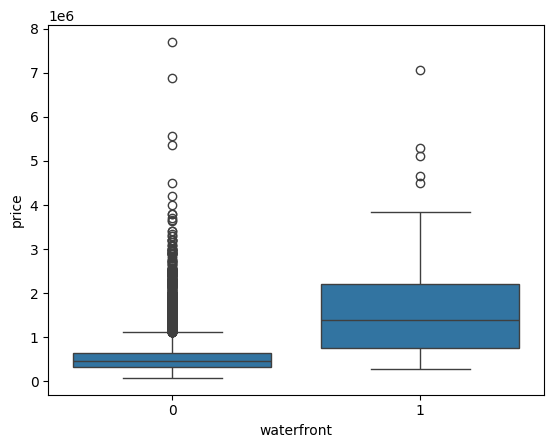

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='year', ylabel='price'>

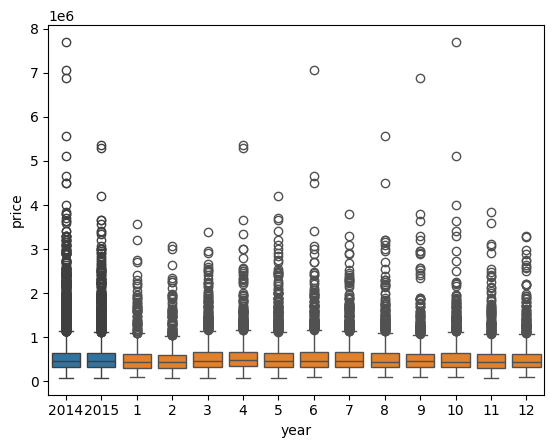

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price',data=df)
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

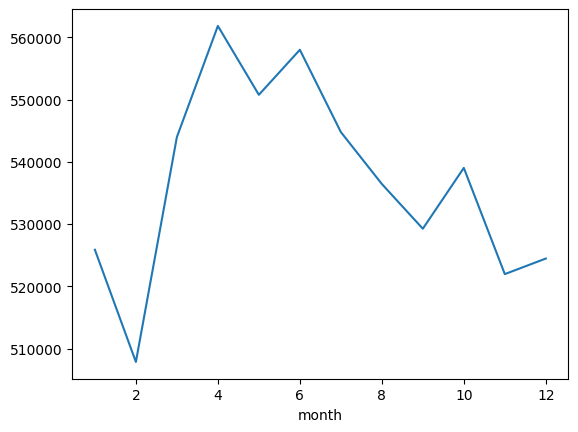

In [ ]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

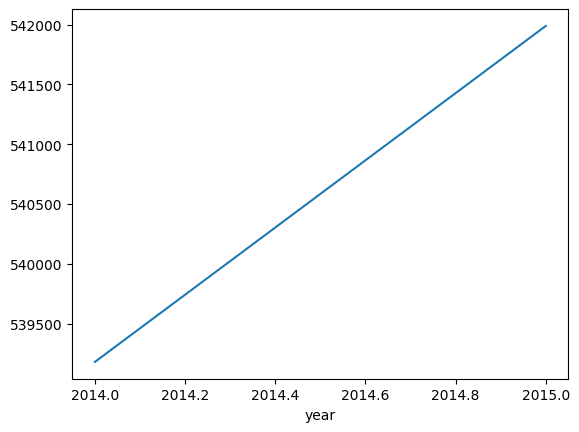

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [ ]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [ ]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [ ]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [ ]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train

array([[[0.09090909, 0.21875   , 0.11245283, ..., 0.01429443,
         0.36363636, 0.        ]],

       [[0.06060606, 0.125     , 0.05358491, ..., 0.0049957 ,
         0.18181818, 1.        ]],

       [[0.09090909, 0.125     , 0.05962264, ..., 0.00821206,
         0.09090909, 1.        ]],

       ...,

       [[0.09090909, 0.3125    , 0.13811321, ..., 0.00229625,
         0.72727273, 0.        ]],

       [[0.03030303, 0.09375   , 0.00679245, ..., 0.0164827 ,
         0.45454545, 0.        ]],

       [[0.12121212, 0.3125    , 0.21433962, ..., 0.00614095,
         0.18181818, 1.        ]]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input, Concatenate, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
input_layer = Input(shape=(1, X_train.shape[2]))

# LSTM layers
lstm_1 = LSTM(64, activation='tanh', return_sequences=True)(input_layer)
lstm_1 = BatchNormalization()(lstm_1)
lstm_1 = Dropout(0.3)(lstm_1)
lstm_2 = LSTM(32, activation='tanh', return_sequences=True)(lstm_1)
lstm_2 = BatchNormalization()(lstm_2)
lstm_2 = Dropout(0.3)(lstm_2)
lstm_3 = LSTM(16, activation='tanh')(lstm_2)
lstm_3 = BatchNormalization()(lstm_3)
lstm_3 = Dropout(0.3)(lstm_3)

# Dense layers
dense_1 = Dense(64, activation='relu')(input_layer)
dense_1 = BatchNormalization()(dense_1)
dense_1 = Dropout(0.3)(dense_1)
dense_2 = Dense(32, activation='relu')(dense_1)
dense_2 = BatchNormalization()(dense_2)
dense_2 = Dropout(0.3)(dense_2)
dense_3 = Dense(16, activation='relu')(dense_2)
dense_3 = BatchNormalization()(dense_3)
dense_3 = Dropout(0.3)(dense_3)
dense_3_reshaped = Reshape((16,))(dense_3)

#Concatenate LSTM output and dense layer output
concatenated_layer = Concatenate()([lstm_3, dense_3_reshaped])

# Fully connected layers
fc_1 = Dense(32, activation='relu')(concatenated_layer)
fc_1 = BatchNormalization()(fc_1)

output_layer = Dense(1)(fc_1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an optimized learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
# Implement learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
history = model.fit(X_train, y_train, epochs=400, batch_size=128, validation_data=(X_test, y_test), verbose=1)

Epoch 1/400
136/136 [==============================] - 13s 23ms/step - loss: 0.6359 - val_loss: 0.0254
Epoch 2/400
136/136 [==============================] - 2s 11ms/step - loss: 0.1223 - val_loss: 0.0334
Epoch 3/400
136/136 [==============================] - 2s 11ms/step - loss: 0.0609 - val_loss: 0.0287
Epoch 4/400
136/136 [==============================] - 2s 11ms/step - loss: 0.0362 - val_loss: 0.0142
Epoch 5/400
136/136 [==============================] - 2s 12ms/step - loss: 0.0243 - val_loss: 0.0094
Epoch 6/400
136/136 [==============================] - 2s 18ms/step - loss: 0.0184 - val_loss: 0.0079
Epoch 7/400
136/136 [==============================] - 2s 12ms/step - loss: 0.0140 - val_loss: 0.0066
Epoch 8/400
136/136 [==============================] - 2s 11ms/step - loss: 0.0115 - val_loss: 0.0057
Epoch 9/400
136/136 [==============================] - 1s 11ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 10/400
136/136 [==============================] - 2s 11ms/step - loss: 0.00

<Axes: >

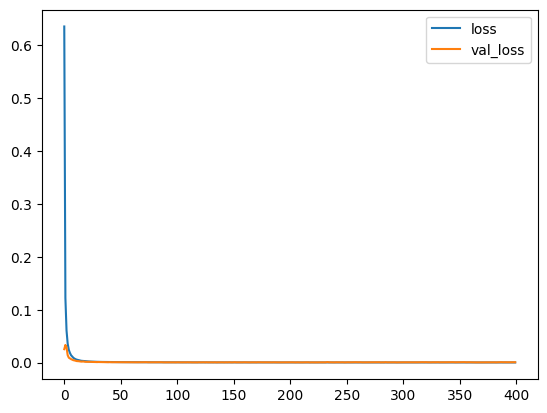

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

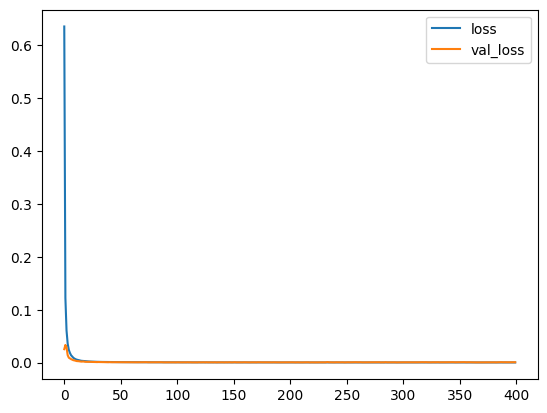

In [ ]:
losses.plot()

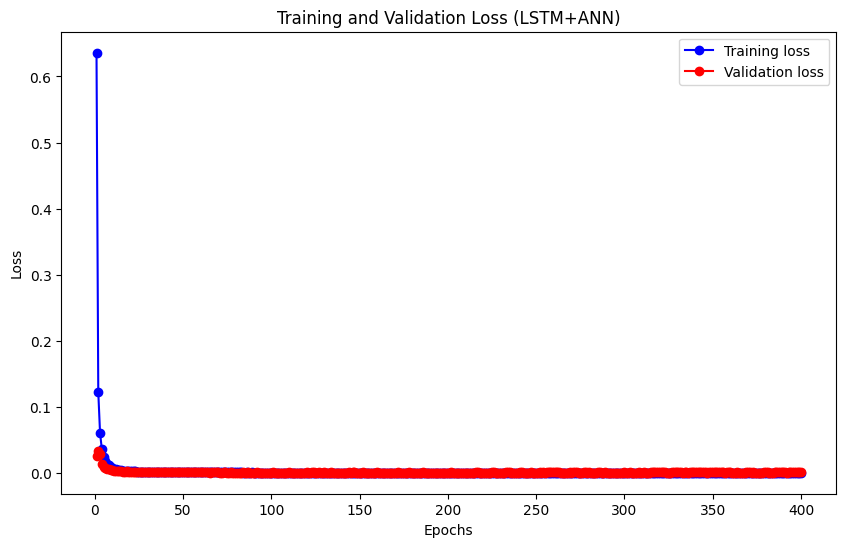

In [ ]:
# Extracting the loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating epochs range from 1 to 400 (or you can use len(train_loss) if you prefer)
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss (LSTM+ANN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

136/136 [==============================] - 3s 5ms/step


In [ ]:
mean_squared_error(y_test,predictions)

0.0007462680204717139

In [ ]:
explained_variance_score(y_test,predictions)

0.7135895230454958

In [ ]:
mean_absolute_error(y_test,predictions)

0.010065696324553288

In [ ]:
X_test

array([[[0.12121212, 0.28125   , 0.13433962, ..., 0.00809719,
         0.81818182, 0.        ]],

       [[0.15151515, 0.375     , 0.19698113, ..., 0.00646948,
         0.63636364, 0.        ]],

       [[0.12121212, 0.3125    , 0.26264151, ..., 0.01037736,
         0.63636364, 0.        ]],

       ...,

       [[0.12121212, 0.3125    , 0.16181132, ..., 0.00430648,
         0.81818182, 0.        ]],

       [[0.12121212, 0.21875   , 0.14792453, ..., 0.01045203,
         1.        , 0.        ]],

       [[0.12121212, 0.3125    , 0.17207547, ..., 0.00614095,
         1.        , 0.        ]]])

In [ ]:
df['price'].mean()

540088.1417665294

In [ ]:
df['price'].median()

450000.0

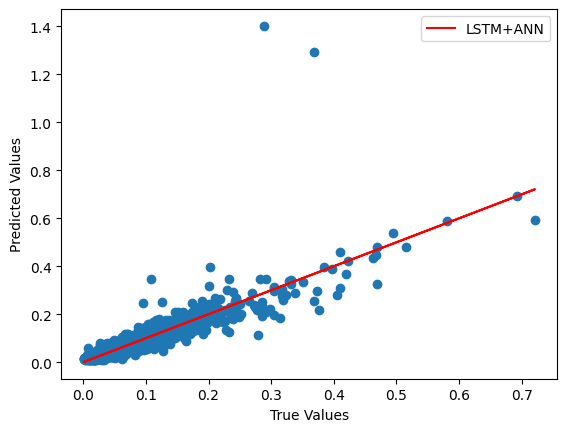

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r', label='LSTM+ANN')
# Add labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

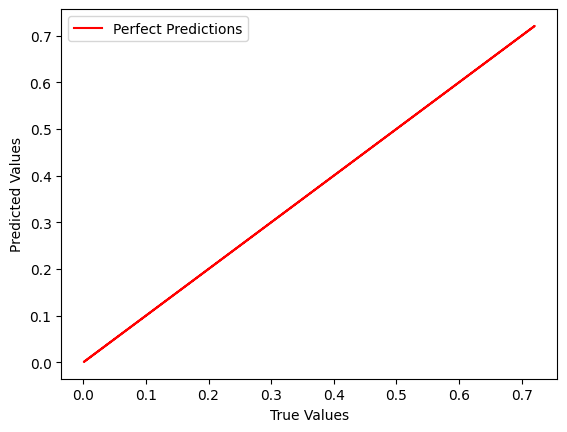

In [ ]:
# Plot perfect predictions line
plt.plot(y_test, y_test, 'r', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler_X.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

array([[0.09090909, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.81818182, 0.        ]])

In [ ]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64